In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("World_population.csv")
df

,Country Name,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,CHN,East Asia & Pacific,Upper middle income,"Population, total",SP.POP.TOTL,667070000,660330000,665770000,682335000,...,1363240000,1371860000,1379860000,1387790000,1396215000,1402760000,1407745000,1411100000,1412360000,1412175000
1,India,IND,South Asia,Lower middle income,"Population, total",SP.POP.TOTL,445954579,456351876,467024193,477933619,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
2,United States,USA,Latin America & Caribbean,High income,"Population, total",SP.POP.TOTL,180671000,183691000,186538000,189242000,...,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331511512,332031554,333287557
3,Indonesia,IDN,East Asia & Pacific,Upper middle income,"Population, total",SP.POP.TOTL,88382881,90816938,93345489,95962527,...,253275918,256229761,259091970,261850182,264498852,267066843,269582878,271857970,273753191,275501339
4,Pakistan,PAK,South Asia,Lower middle income,"Population, total",SP.POP.TOTL,45954226,47060915,48161841,49325050,...,205337562,208251628,210969298,213524840,216379655,219731479,223293280,227196741,231402117,235824862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Gibraltar,GIB,Europe & Central Asia,High income,"Population, total",SP.POP.TOTL,21822,21907,22249,22796,...,32411,32452,32520,32565,32602,32648,32685,32709,32669,32649
202,St. Martin (French part),MAF,Latin America & Caribbean,High income,"Population, total",SP.POP.TOTL,4135,4258,4388,4524,...,35639,35261,35020,34811,34496,33852,33121,32553,31948,31791
203,Palau,PLW,East Asia & Pacific,Upper middle income,"Population, total",SP.POP.TOTL,9446,9639,9851,10076,...,17805,17796,17794,17816,17837,17864,17916,17972,18024,18055
204,Nauru,NRU,East Asia & Pacific,High income,"Population, total",SP.POP.TOTL,4582,4753,4950,5198,...,10694,10940,11185,11437,11682,11924,12132,12315,12511,12668


In [15]:
df.drop(["Indicator Name","Indicator Code"], axis=1, inplace=True)
df

,Country Name,Country Code,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,CHN,East Asia & Pacific,Upper middle income,667070000,660330000,665770000,682335000,698355000,715185000,...,1363240000,1371860000,1379860000,1387790000,1396215000,1402760000,1407745000,1411100000,1412360000,1412175000
1,India,IND,South Asia,Lower middle income,445954579,456351876,467024193,477933619,489059309,500114346,...,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
2,United States,USA,Latin America & Caribbean,High income,180671000,183691000,186538000,189242000,191889000,194303000,...,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331511512,332031554,333287557
3,Indonesia,IDN,East Asia & Pacific,Upper middle income,88382881,90816938,93345489,95962527,98675061,101157868,...,253275918,256229761,259091970,261850182,264498852,267066843,269582878,271857970,273753191,275501339
4,Pakistan,PAK,South Asia,Lower middle income,45954226,47060915,48161841,49325050,50552592,51841626,...,205337562,208251628,210969298,213524840,216379655,219731479,223293280,227196741,231402117,235824862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Gibraltar,GIB,Europe & Central Asia,High income,21822,21907,22249,22796,23347,23910,...,32411,32452,32520,32565,32602,32648,32685,32709,32669,32649
202,St. Martin (French part),MAF,Latin America & Caribbean,High income,4135,4258,4388,4524,4666,4832,...,35639,35261,35020,34811,34496,33852,33121,32553,31948,31791
203,Palau,PLW,East Asia & Pacific,Upper middle income,9446,9639,9851,10076,10318,10563,...,17805,17796,17794,17816,17837,17864,17916,17972,18024,18055
204,Nauru,NRU,East Asia & Pacific,High income,4582,4753,4950,5198,5484,5804,...,10694,10940,11185,11437,11682,11924,12132,12315,12511,12668


In [4]:
df.shape

(206, 67)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  206 non-null    object
 1   Country Code  206 non-null    object
 2   Region        206 non-null    object
 3   IncomeGroup   206 non-null    object
 4   1960          206 non-null    int64 
 5   1961          206 non-null    int64 
 6   1962          206 non-null    int64 
 7   1963          206 non-null    int64 
 8   1964          206 non-null    int64 
 9   1965          206 non-null    int64 
 10  1966          206 non-null    int64 
 11  1967          206 non-null    int64 
 12  1968          206 non-null    int64 
 13  1969          206 non-null    int64 
 14  1970          206 non-null    int64 
 15  1971          206 non-null    int64 
 16  1972          206 non-null    int64 
 17  1973          206 non-null    int64 
 18  1974          206 non-null    int64 
 19  1975    

In [6]:
df.describe(include="all")

,Country Name,Country Code,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,206,206,206,206,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,...,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02,2.060000e+02
unique,206,206,7,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,China,CHN,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,55,82,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.460567e+07,1.480144e+07,1.506255e+07,1.538253e+07,1.570447e+07,1.602991e+07,...,3.469789e+07,3.511845e+07,3.553511e+07,3.595101e+07,3.636517e+07,3.676811e+07,3.715741e+07,3.753505e+07,3.786407e+07,3.816503e+07
std,NaN,NaN,NaN,NaN,5.861626e+07,5.873556e+07,5.952658e+07,6.092200e+07,6.229773e+07,6.371136e+07,...,1.353440e+08,1.366162e+08,1.378375e+08,1.390626e+08,1.403013e+08,1.414166e+08,1.424255e+08,1.433373e+08,1.440289e+08,1.445903e+08
min,NaN,NaN,NaN,NaN,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,NaN,NaN,NaN,NaN,2.776508e+05,2.876880e+05,2.964058e+05,3.051365e+05,3.130285e+05,3.193672e+05,...,9.280280e+05,9.339418e+05,9.394648e+05,9.445935e+05,9.493225e+05,9.535465e+05,9.573472e+05,9.628555e+05,9.698468e+05,9.775368e+05
50%,NaN,NaN,NaN,NaN,2.629456e+06,2.683594e+06,2.714676e+06,2.745366e+06,2.776084e+06,2.806572e+06,...,6.152510e+06,6.241934e+06,6.348769e+06,6.335716e+06,6.429396e+06,6.525013e+06,6.616506e+06,6.704918e+06,6.803863e+06,6.796542e+06
75%,NaN,NaN,NaN,NaN,8.187734e+06,8.376921e+06,8.476648e+06,8.686902e+06,8.985505e+06,9.067911e+06,...,2.296341e+07,2.335565e+07,2.376118e+07,2.420794e+07,2.478416e+07,2.538968e+07,2.577562e+07,2.633518e+07,2.689195e+07,2.748790e+07


In [7]:
missing_data=df.isnull()
missing_data

,Country Name,Country Code,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Country Name
False    206
Name: Country Name, dtype: int64

Country Code
False    206
Name: Country Code, dtype: int64

Region
False    206
Name: Region, dtype: int64

IncomeGroup
False    206
Name: IncomeGroup, dtype: int64

1960
False    206
Name: 1960, dtype: int64

1961
False    206
Name: 1961, dtype: int64

1962
False    206
Name: 1962, dtype: int64

1963
False    206
Name: 1963, dtype: int64

1964
False    206
Name: 1964, dtype: int64

1965
False    206
Name: 1965, dtype: int64

1966
False    206
Name: 1966, dtype: int64

1967
False    206
Name: 1967, dtype: int64

1968
False    206
Name: 1968, dtype: int64

1969
False    206
Name: 1969, dtype: int64

1970
False    206
Name: 1970, dtype: int64

1971
False    206
Name: 1971, dtype: int64

1972
False    206
Name: 1972, dtype: int64

1973
False    206
Name: 1973, dtype: int64

1974
False    206
Name: 1974, dtype: int64

1975
False    206
Name: 1975, dtype: int64

1976
False    206
Name: 1976, dtype: int64

1977
False    206
Name: 19

In [9]:
if df.isnull().values.any():
    print("mising data")
else:
    pass

In [10]:
print(df["Country Name"].duplicated().sum())

0


In [11]:
region_counts= df["Region"].value_counts().to_frame()
region_counts.rename(columns={"Region": "value_counts"}, inplace=True)
region_counts.index.name="Region"
region_counts

,value_counts
Region,
Europe & Central Asia,55
Sub-Saharan Africa,44
Latin America & Caribbean,41
East Asia & Pacific,34
Middle East & North Africa,21
South Asia,8
North America,3


In [13]:
income_counts= df["IncomeGroup"].value_counts()
income_counts

High income            82
Upper middle income    51
Lower middle income    50
Low income             23
Name: IncomeGroup, dtype: int64

In [14]:
grouping_1=df[["Region", "IncomeGroup","2022"]]
grouped_test1= grouping_1.groupby(["Region", "IncomeGroup"], as_index=False).sum()
grouped_test1

,Region,IncomeGroup,2022
0,East Asia & Pacific,High income,220339897
1,East Asia & Pacific,Low income,26069416
2,East Asia & Pacific,Lower middle income,218516456
3,East Asia & Pacific,Upper middle income,1798054485
4,Europe & Central Asia,High income,661074556
5,Europe & Central Asia,Lower middle income,13509618
6,Europe & Central Asia,Upper middle income,110659492
7,Latin America & Caribbean,High income,491011942
8,Latin America & Caribbean,Lower middle income,41190358
9,Latin America & Caribbean,Upper middle income,582115325


In [15]:
grouped_pivot= grouped_test1.pivot(index="Region", columns="IncomeGroup")
grouped_pivot= grouped_pivot.fillna(0)
grouped_pivot

2022                                   \
IncomeGroup                 High income   Low income Lower middle income   
Region                                                                     
East Asia & Pacific         220339897.0   26069416.0        2.185165e+08   
Europe & Central Asia       661074556.0          0.0        1.350962e+07   
Latin America & Caribbean   491011942.0          0.0        4.119036e+07   
Middle East & North Africa   95768359.0   59939588.0        3.847782e+08   
North America                74641534.0          0.0        0.000000e+00   
South Asia                          0.0   41128771.0        1.877695e+09   
Sub-Saharan Africa           22125249.0  549133325.0        5.092312e+08   

                                                
IncomeGroup                Upper middle income  
Region                                          
East Asia & Pacific               1.798054e+09  
Europe & Central Asia             1.106595e+08  
Latin America & Caribbean         5.821153e+08  
Middle East & North Africa        5.394748e+07  
North America                     0.000000e+00  
South Asia                        5.237870e+05  
Sub-Saharan Africa                3.054141e+07

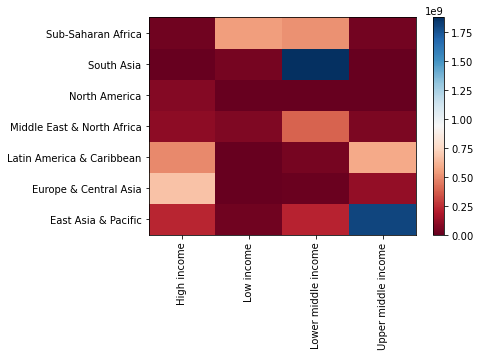

In [16]:
fig, ax= plt.subplots()
im= ax.pcolor(grouped_pivot, cmap="RdBu")

#label names
col_labels= grouped_pivot.columns.levels[1]
row_labels= grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) +0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) +0.5, minor=False)

ax.set_xticklabels(col_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
              

#ax.set_xticklabels(col_labels, minor= False)
#ax.set_yticklabels(row_labels, minor= False)

plt.xticks(rotation=90) 

fig.colorbar(im)
plt.show()

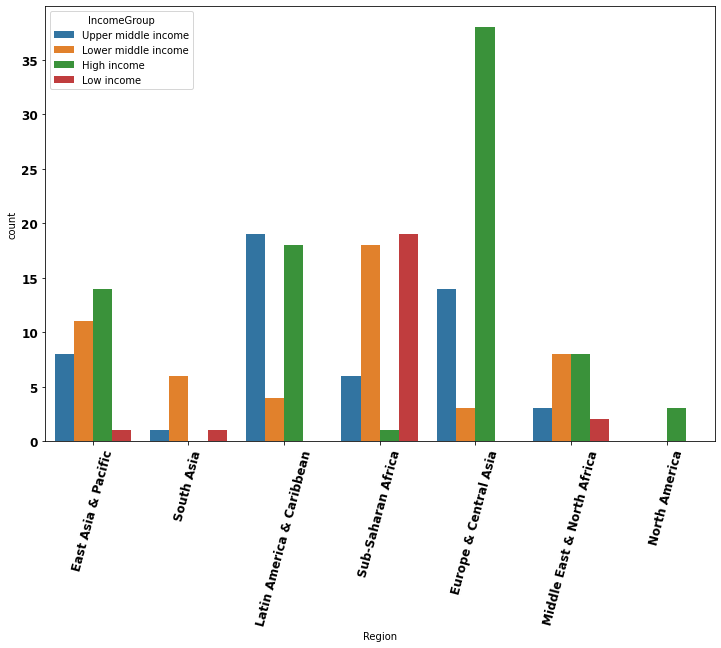

In [18]:
plt.figure(figsize=(12,8))

sns.countplot(x="Region", hue="IncomeGroup",data= df)

plt.xticks(rotation=75, fontweight="bold", fontsize="large")
plt.yticks(ha="right",fontweight="bold", fontsize="large")
plt.show()

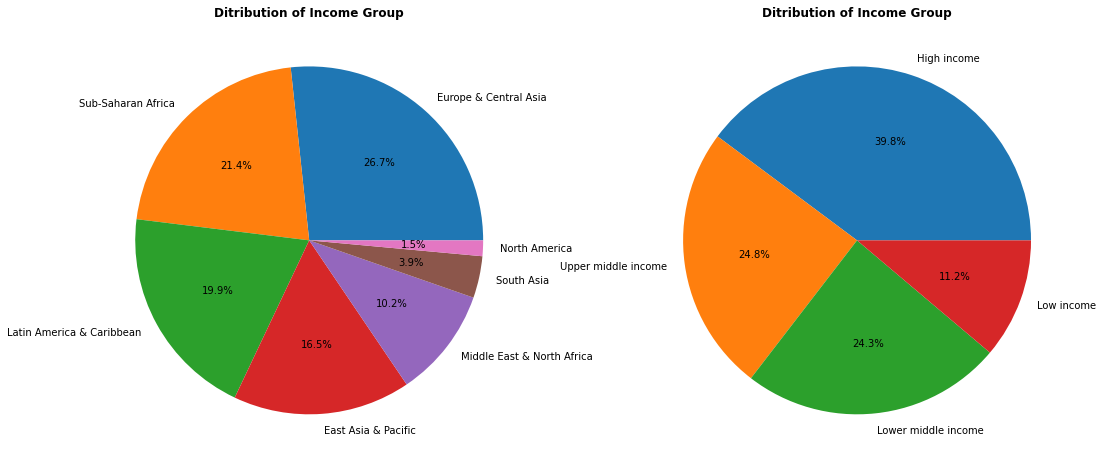

In [19]:
region_counts= df["Region"].value_counts()
income_counts= df["IncomeGroup"].value_counts()

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(18,8))


ax1.pie(region_counts, labels= region_counts.index, autopct="%1.1f%%")
ax1.set_title("Ditribution of Income Group", fontweight="bold")

ax2.pie(income_counts, labels= income_counts.index, autopct="%1.1f%%")
ax2.set_title("Ditribution of Income Group", fontweight="bold")
plt.show()

<Figure size 864x648 with 0 Axes>

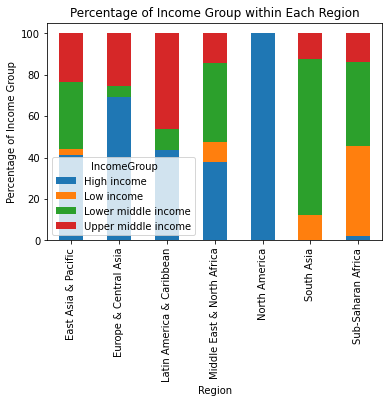

In [20]:
region_counts= df["Region"].value_counts()
income_counts= df["IncomeGroup"].value_counts()

# Create a DataFrame with counts for both regions and income groups
df_count=pd.DataFrame({"Region":region_counts, "IncomeGroup": income_counts})
grouped_df=df.groupby(["Region", "IncomeGroup"]).size().unstack(fill_value=0)

# Calculate the percentage of each IncomeGroup within each Region
percentage_df= grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

#print(percentage_df)

plt.figure(figsize=(12,9))
percentage_df.plot(kind= "bar", stacked= True)

plt.xlabel("Region")
plt.ylabel("Percentage of Income Group")
plt.title("Percentage of Income Group within Each Region")
plt.show()

In [39]:
grouping_2 = df[["Region", "2022"]].copy()  # Use copy to create a new DataFrame
grouping_2.rename(columns={"2022": "2022_Population"}, inplace=True)
grouping_2.reset_index(drop=True, inplace=True)  # Reset the index

grouped_test2 = grouping_2.groupby("Region", as_index=False).sum()
grouped_test2


,Region,2022_Population
0,East Asia & Pacific,2262980254
1,Europe & Central Asia,785243666
2,Latin America & Caribbean,1114317625
3,Middle East & North Africa,594433668
4,North America,74641534
5,South Asia,1919348000
6,Sub-Saharan Africa,1111031162


In [40]:
total_pop_1960= df["1960"].sum()
print("total_population_1960 (Billion):",total_pop_1960 )

total_population_1960 (Billion): 3008767245


In [41]:
sorted_df = df.sort_values(by='1960', ascending=False)
top_20_countries = sorted_df.head(20)
print(top_20_countries)

              Country Name Country Code                     Region  \
Region                                                               
0                    China          CHN        East Asia & Pacific   
1                    India          IND                 South Asia   
2            United States          USA  Latin America & Caribbean   
8       Russian Federation          RUS      Europe & Central Asia   
10                   Japan          JPN        East Asia & Pacific   
3                Indonesia          IDN        East Asia & Pacific   
5                   Brazil          BRA  Latin America & Caribbean   
18                 Germany          DEU      Europe & Central Asia   
21          United Kingdom          GBR      Europe & Central Asia   
7               Bangladesh          BGD                 South Asia   
24                   Italy          ITA      Europe & Central Asia   
20                  France          FRA      Europe & Central Asia   
4                 Pa

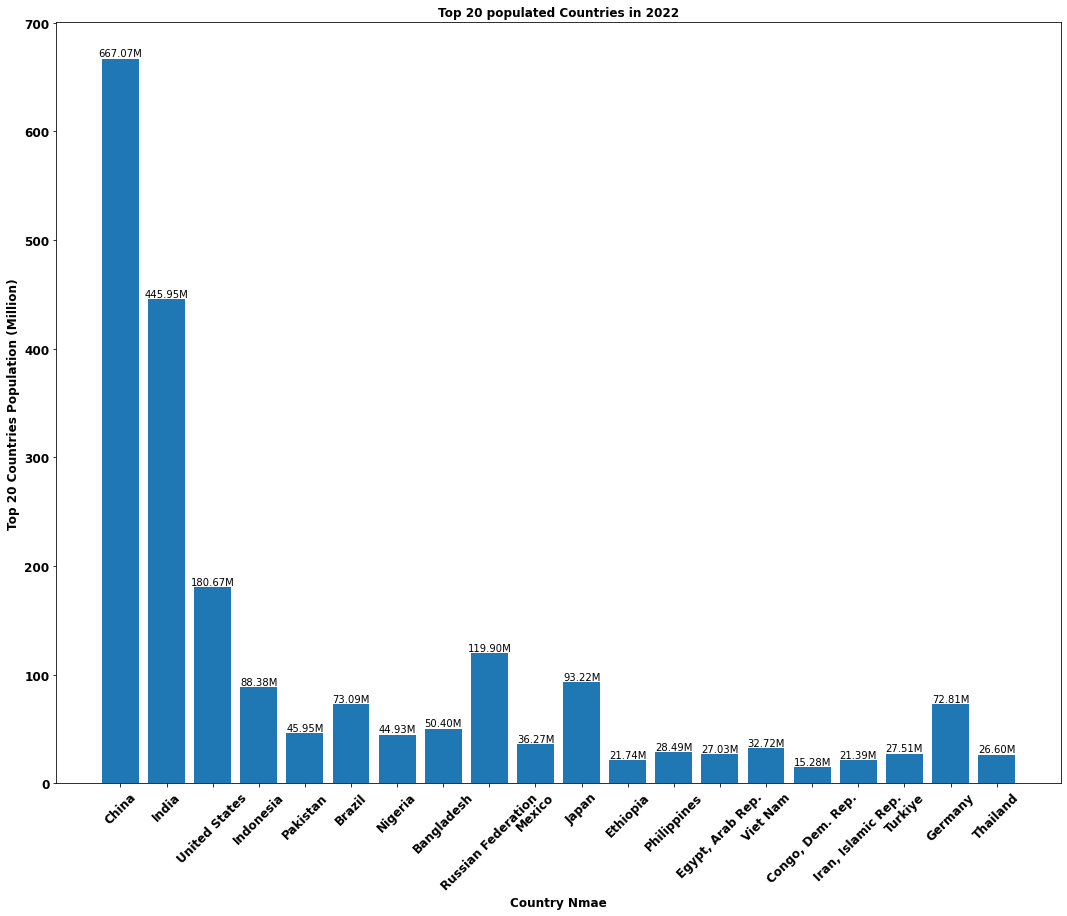

In [42]:
plt.figure(figsize=(18,14))
df["1960_pop_million"] = df["1960"] / 1000000

bars= plt.bar(df["Country Name"][:20], df["1960_pop_million"][:20])
plt.xlabel("Country Nmae", fontweight= "bold", fontsize= "large")
plt.ylabel("Top 20 Countries Population (Million)", fontweight= "bold", fontsize= "large")
plt.title("Top 20 populated Countries in 2022", fontweight= "bold", fontsize= "large")

for bar, population in zip(bars, df["1960_pop_million"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), "{:.2f}M".format(population), 
            ha="center", va="bottom")
    
plt.xticks(rotation= 45, fontweight="bold", fontsize= "large")
plt.yticks(ha="right", fontweight="bold", fontsize= "large")
    
plt.show()    

In [43]:
total_pop_2022= df["2022"].sum()
print("total_population_2022 (Billion):",total_pop_2022) 

total_population_2022 (Billion): 7861995909


In [44]:
# Top 20 populated countries.

sorted_df = df.sort_values(by='2022', ascending=False)
top_20_countries = sorted_df.head(20)
print(top_20_countries)


              Country Name Country Code                      Region  \
Region                                                                
1                    India          IND                  South Asia   
0                    China          CHN         East Asia & Pacific   
2            United States          USA   Latin America & Caribbean   
3                Indonesia          IDN         East Asia & Pacific   
4                 Pakistan          PAK                  South Asia   
6                  Nigeria          NGA          Sub-Saharan Africa   
5                   Brazil          BRA   Latin America & Caribbean   
7               Bangladesh          BGD                  South Asia   
8       Russian Federation          RUS       Europe & Central Asia   
9                   Mexico          MEX   Latin America & Caribbean   
10                   Japan          JPN         East Asia & Pacific   
11                Ethiopia          ETH          Sub-Saharan Africa   
12    

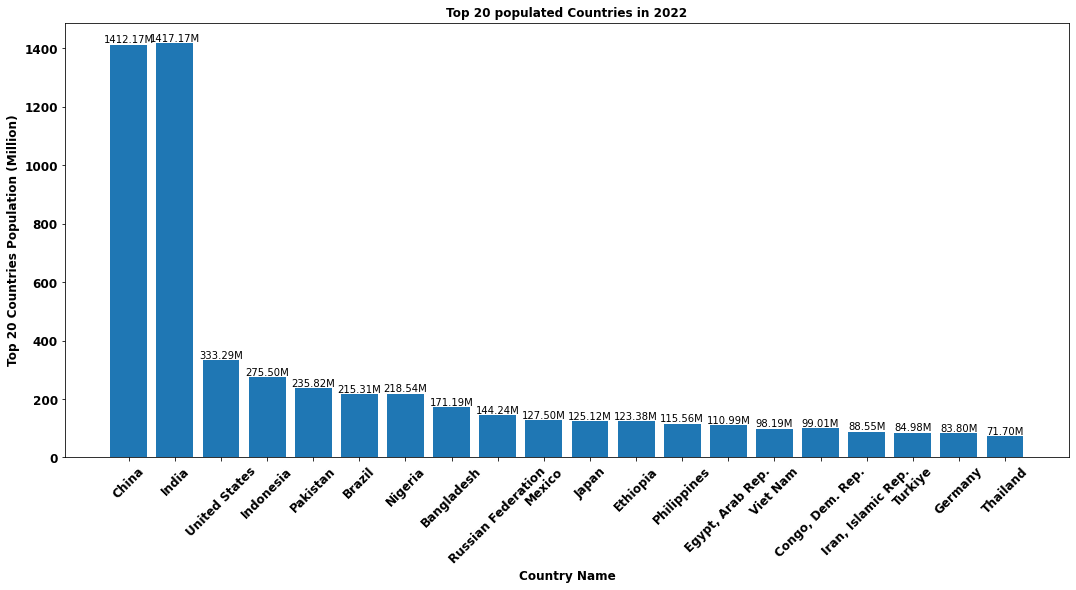

In [45]:
plt.figure(figsize=(18,8))
df["2022"]= df["2022"] / 1000000

bars= plt.bar(df["Country Name"][:20], df["2022"][:20])

plt.xlabel("Country Name", fontweight= "bold", fontsize= "large")
plt.ylabel("Top 20 Countries Population (Million)", fontweight= "bold", fontsize= "large")
plt.title("Top 20 populated Countries in 2022", fontweight= "bold", fontsize= "large")

for bar, population in zip(bars, df["2022"][:20]):
    plt.text(bar.get_x() + bar.get_width() / 2 , bar.get_height(), "{:.2f}M".format(population), ha= "center", va= "bottom")


plt.xticks(rotation=45,fontweight= "bold", fontsize= "large")
plt.yticks(ha= "right",fontweight= "bold", fontsize= "large")
plt.show()

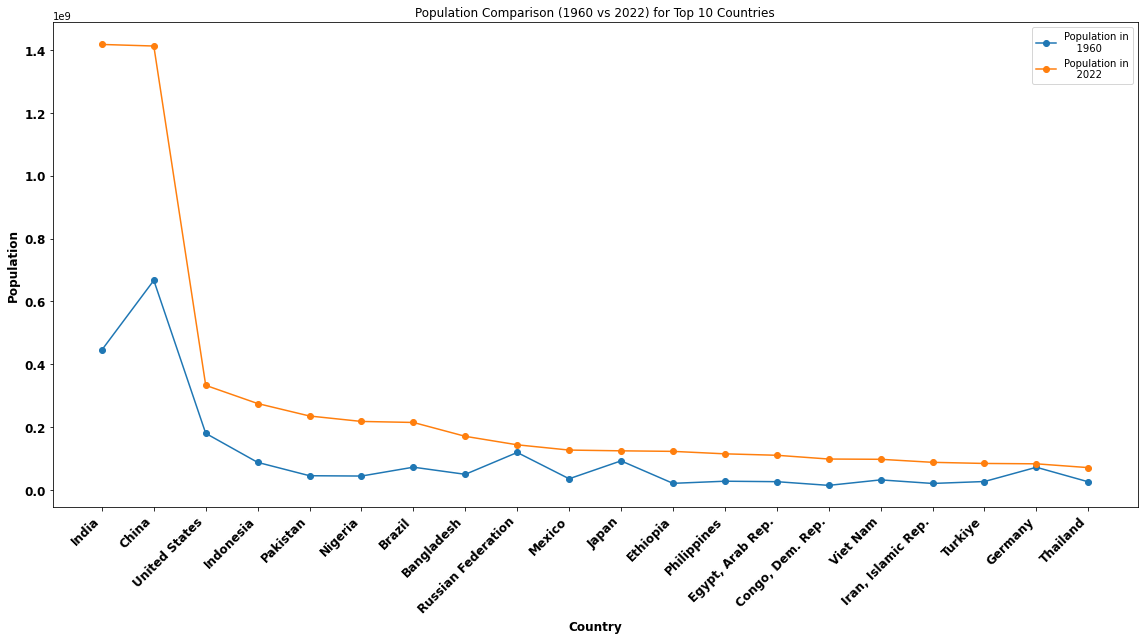

In [46]:
import matplotlib.pyplot as plt

# Assuming 'Country' is the column containing country names
countries = top_20_countries['Country Name']

# Extracting population data for 1960 and 2022
pop_1960 = top_20_countries['1960']
pop_2022 = top_20_countries['2022']

# Plotting the data
plt.figure(figsize=(16, 9))
plt.plot(countries, pop_1960, marker='o', label='Population in\n    1960')
plt.plot(countries, pop_2022, marker='o', label='Population in\n    2022')

# Adding labels and title
plt.xlabel('Country', fontweight="bold", fontsize='large')
plt.ylabel('Population', fontweight="bold", fontsize='large')
plt.title('Population Comparison (1960 vs 2022) for Top 10 Countries')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right',fontsize='large', fontweight='bold')
plt.yticks(fontsize='large', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


enter country name: INdiA
population_growth_rate of India from 1960 to2022 is: 217.78%


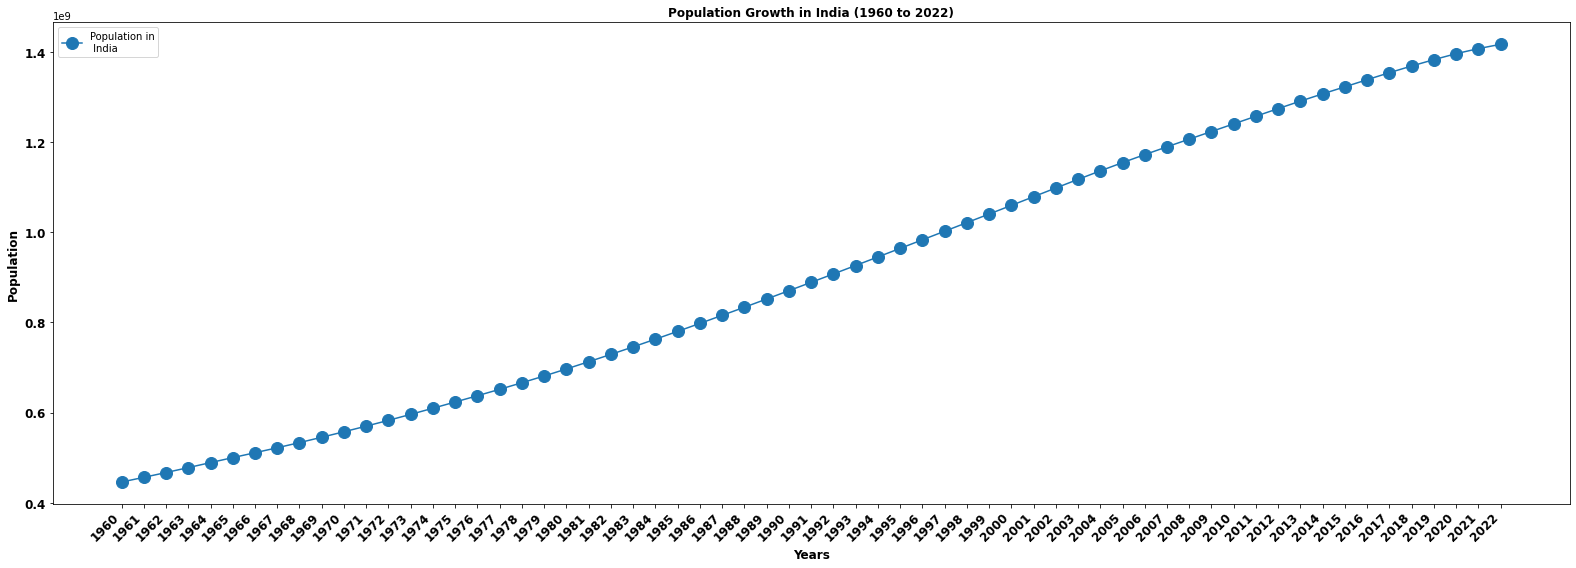

In [8]:
user_country= input("enter country name: ")
user_country= user_country.capitalize()
country_name= df[df["Country Name"]==user_country]

if country_name.empty:
    print(f"the given {country_name} has no data available, kindly choosed the other {country_name} with first latter capital.")
else:
    years_data= df.columns[4:]
    population_data= country_name[years_data]
    
growth_rate= (population_data.iloc[:,-1] - population_data.iloc[:,0]) / population_data.iloc[:,0] * 100

print(f"population_growth_rate of {user_country} from {years_data[0]} to{years_data[-1]} is: {growth_rate.values[0]:.2f}%")
    
plt.figure(figsize=(22,8))
plt.plot(years_data, population_data.values.flatten(), marker="o", label=f"Population in\n {user}" , markersize=12)
plt.xlabel("Years", fontweight="bold", fontsize= "large")
plt.ylabel("Population", fontweight="bold", fontsize= "large")

plt.xticks(rotation=45, ha= "right", fontweight="bold", fontsize= "large")
plt.yticks(fontweight="bold", fontsize= "large")
plt.title(f'Population Growth in {user_country} ({years_data[0]} to {years_data[-1]})', 
              fontweight="bold", fontsize='large')          
plt.legend()
plt.tight_layout()
plt.show()

Enter the country name: cHinA
Population growth rate for China from 1960 to 2022: 111.70%


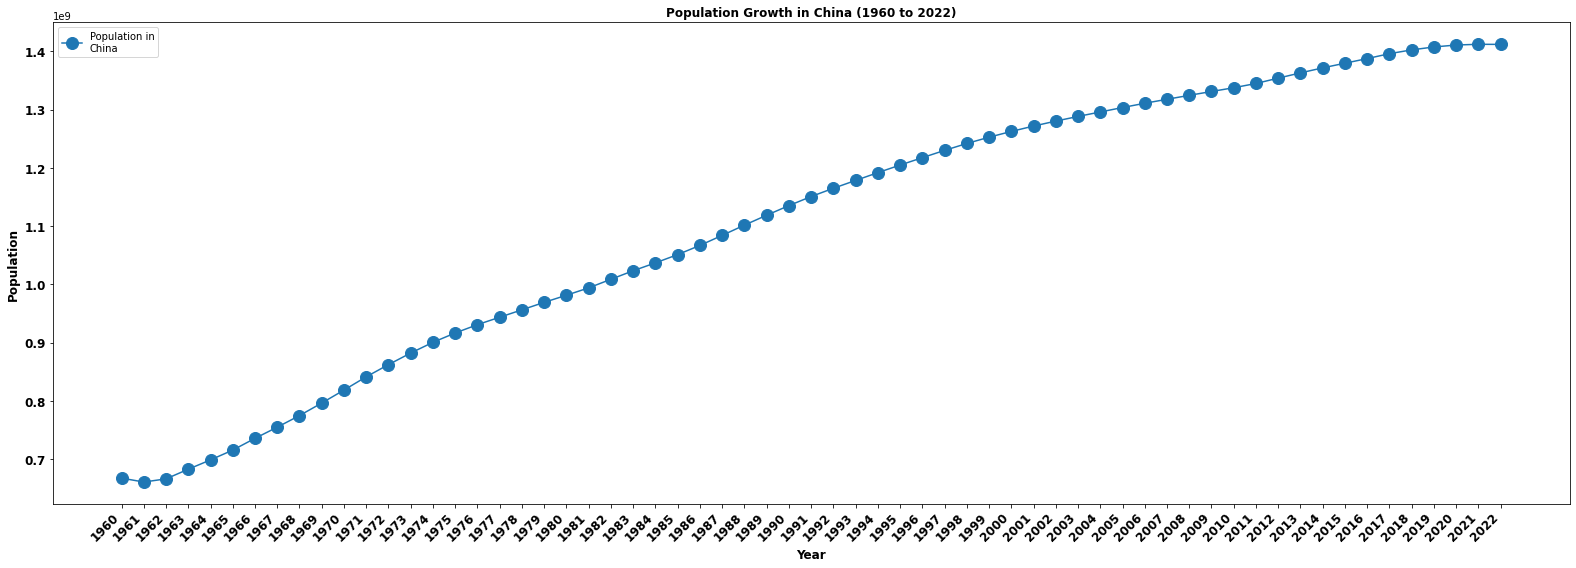

In [7]:
# Assuming 'Country Name' is the column containing country names
user_country = input("Enter the country name: ")
user_country=user_country.capitalize()
# Extracting relevant columns for the selected country
country_data = df[df['Country Name'] == user_country]

# Check if the entered country exists in the dataset
if country_data.empty:
    print(f"Data not available for {user_country}. Please choose another country.")
else:
    # Extracting columns for years and population
    years_column = df.columns[4:]  # Assuming columns from 1960 onwards are years
    population_data = country_data[years_column]

    # Calculate percentage change or growth rate
    growth_rate = (population_data.iloc[:, -1] - population_data.iloc[:, 0]) / population_data.iloc[:, 0] * 100

    # Print the growth rate with 2 decimal digits
    print(f"Population growth rate for {user_country} from {years_column[0]} to {years_column[-1]}: {growth_rate.values[0]:.2f}%")

    # Plotting the population data
    plt.figure(figsize=(22, 8))
    plt.plot(years_column, population_data.values.flatten(), marker='o',label=f'Population in\n{user_country}', markersize=12)

    # Adding labels and title with fontweight
    plt.xlabel('Year', fontweight="bold", fontsize='large')
    plt.ylabel('Population', fontweight="bold", fontsize='large')
    plt.title(f'Population Growth in {user_country} ({years_column[0]} to {years_column[-1]})', 
              fontweight="bold", fontsize='large')
    plt.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize='large', fontweight='bold')
    plt.yticks(fontsize='large', fontweight='bold')

    # Display the plot
    plt.tight_layout()
    plt.show()


Enter a country to compare (enter 'done' to finish): pakistan
Enter a country to compare (enter 'done' to finish): india
Enter a country to compare (enter 'done' to finish): done
Population growth rate for Pakistan from 1960 to 2022: 413.17%
Population growth rate for India from 1960 to 2022: 217.78%


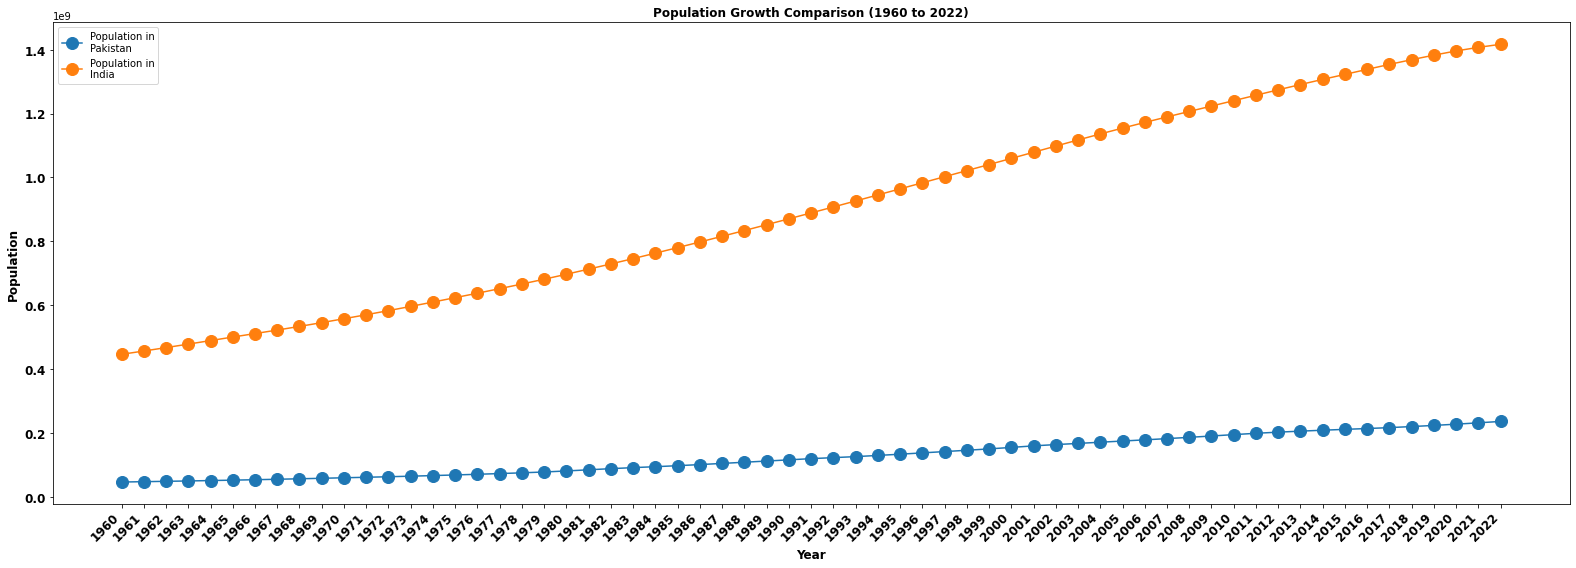

In [33]:
# Getting user input for countries to compare
countries_to_compare = []
while True:
    user_country = input("Enter a country to compare (enter 'done' to finish): ")
    user_country= user_country.capitalize()
    
    if user_country == 'Done':
        break
    
    if user_country in df['Country Name'].unique():
        countries_to_compare.append(user_country)
    else:
        print(f"Country '{user_country}' not found in the dataset. Please enter a valid country.")

plt.figure(figsize=(22, 8))

for country in countries_to_compare:
    # Extracting relevant columns for the selected country
    country_data = df[df['Country Name'] == country]

    years_column = df.columns[4:]  
    population_data = country_data[years_column]

    # Calculate growth rate percentage
    growth_rate = (population_data.iloc[:, -1] - population_data.iloc[:, 0]) / population_data.iloc[:, 0] * 100

    # Print the growth rate with 2 decimal digits
    print(f"Population growth rate for {country} from {years_column[0]} to {years_column[-1]}: {growth_rate.values[0]:.2f}%")

    plt.plot(years_column, population_data.values.flatten(), marker='o', label=f'Population in\n{country}', markersize=12)

# Adding labels and title
plt.xlabel('Year', fontweight="bold", fontsize='large')
plt.ylabel('Population', fontweight="bold", fontsize='large')
plt.title(f'Population Growth Comparison ({years_column[0]} to {years_column[-1]})', fontweight="bold", fontsize='large')
plt.legend()

plt.xticks(rotation=45, ha='right', fontsize='large', fontweight='bold')
plt.yticks(fontsize='large', fontweight='bold')

plt.tight_layout()
plt.show()


Enter the country name: China
Predicted population for China in 2035: 1668911606.50


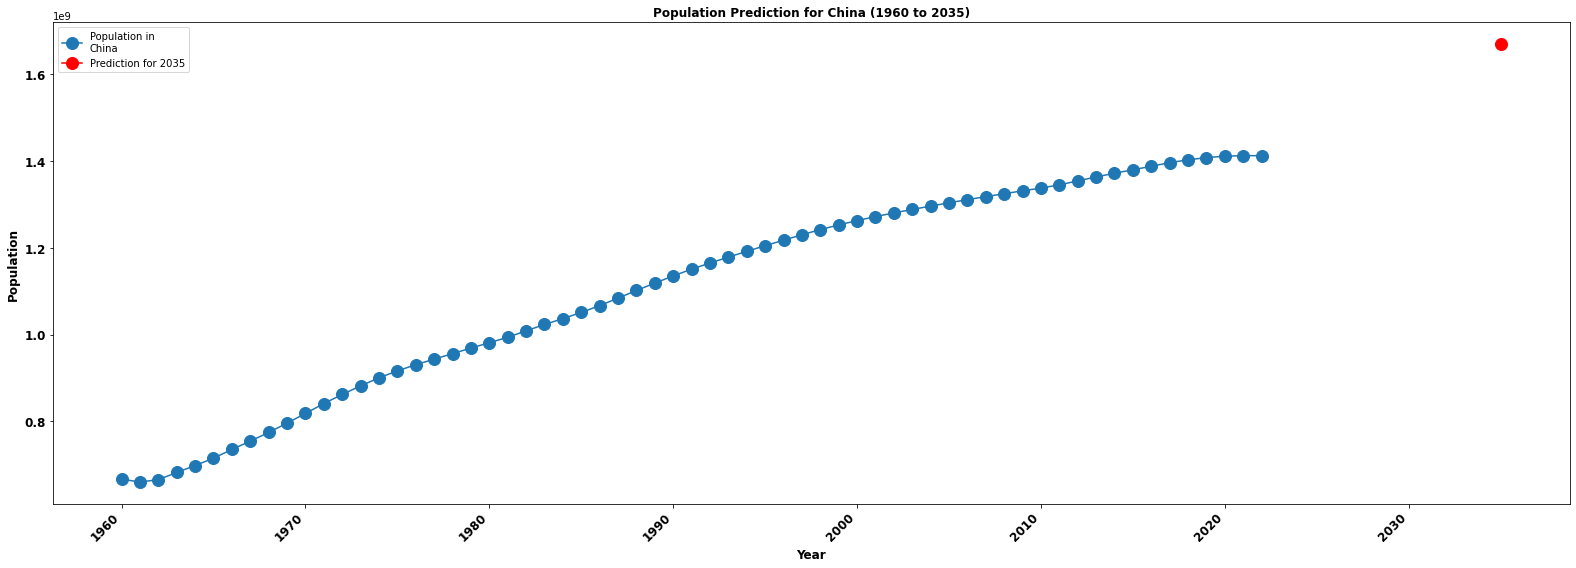

In [35]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have already read the CSV file into the DataFrame df
# df = pd.read_csv("your_file.csv")

user_country = input("Enter the country name: ")

# Extracting relevant columns for the selected country
country_data = df[df['Country Name'] == user_country]

# Extracting columns for years and population
year_columns = df.columns[4:]

try:
    # Convert years to integers, ignoring errors
    years_column = pd.to_numeric(year_columns, errors='coerce', downcast='integer')
    
    # Drop NaN values
    years_column = years_column.dropna().astype(int)
    
    population_data = country_data[year_columns]

    # Drop columns with missing data
    population_data = population_data.dropna(axis=1)

    # Check if there are still years available after dropping missing data
    if population_data.empty:
        print(f"No population data available for {user_country} in the selected years.")
    else:
        # Prepare the data for linear regression
        X = np.array([years_column]).reshape(-1, 1)
        y = population_data.values.flatten()

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict the population for 2035
        future_year = 2035
        future_population = model.predict(np.array([[future_year]]))[0]

        # Print the prediction
        print(f"Predicted population for {user_country} in {future_year}: {future_population:.2f}")

        # Plotting the population data and the linear regression line
        plt.figure(figsize=(22, 8))
        plt.plot(years_column, y, marker='o', label=f'Population in\n{user_country}', markersize=12)
        plt.plot([future_year], [future_population], marker='o', color='red', label=f'Prediction for {future_year}', markersize=12)

        # Adding labels and title with fontweight
        plt.xlabel('Year', fontweight="bold", fontsize='large')
        plt.ylabel('Population', fontweight="bold", fontsize='large')
        plt.title(f'Population Prediction for {user_country} ({years_column.min()} to {future_year})', fontweight="bold", fontsize='large')
        plt.legend()

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize='large', fontweight='bold')
        plt.yticks(fontsize='large', fontweight='bold')

        # Display the plot
        plt.tight_layout()
        plt.show()

except ValueError as e:
    print(f"Error: {e}")
